In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('train.csv').sample(50000, random_state=23)


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /root/notebooks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
STOP_WORDS = nltk.corpus.stopwords.words()

In [4]:


def clean_sentence(val):
    '''remove chars that are not letters or numbers, downcase, then remove stop words'''
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    '''drop nans, then apply 'clean_sentence' function to question1 and 2'''
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data



In [5]:
data = clean_dataframe(data)
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex necessary relationship,sex important good relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories ever,0
294691,294691,150129,93109,best way digital marketing,best unique ways digital marketing,1
104145,104145,171986,171987,best way grow facebook fan page,get followers facebook page,1
357893,357893,487310,487311,suppose host sends two tcp segments back back ...,suppose host sends two tcp segments back back ...,1


In [6]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['sex', 'necessary', 'relationship'], ['inspiring', 'start', 'stories']]

In [7]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['trump']

array([-0.01189561,  0.5261668 ,  0.5222367 , -0.23500884, -0.16890158,
        0.2604683 ,  0.78235555,  0.59410065,  1.0033419 ,  0.95741236,
        1.0323114 , -0.8833068 , -1.063199  , -0.01642032, -0.16508111,
       -0.8971451 , -1.2376685 ,  0.05195988, -0.2648822 ,  0.13180935,
       -0.23531583,  0.8939362 ,  0.4681084 , -0.02887912,  0.89501745,
        0.20221372, -0.49596462, -0.1619223 , -0.6735397 ,  0.3476008 ,
        0.60011965, -1.310361  ,  0.8017416 ,  0.894404  ,  0.9173211 ,
       -0.46048942, -0.6378332 , -1.1110911 , -0.09966994, -0.35590062,
       -0.21404086,  0.48170626,  0.3919756 , -0.23870961, -0.68676084,
        0.33608925, -0.11280297, -1.0904274 , -1.0420077 , -0.2370562 ,
       -0.56997675,  0.28917688, -0.24906029,  0.26869744, -0.43841335,
        1.1474882 , -0.1378049 ,  0.4467618 ,  0.72792697,  0.04051962,
        0.42973635, -0.17402647, -0.7277284 , -0.4037829 , -1.243866  ,
       -0.03141926, -0.6693166 , -0.19318789,  0.9278059 , -0.10

In [8]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


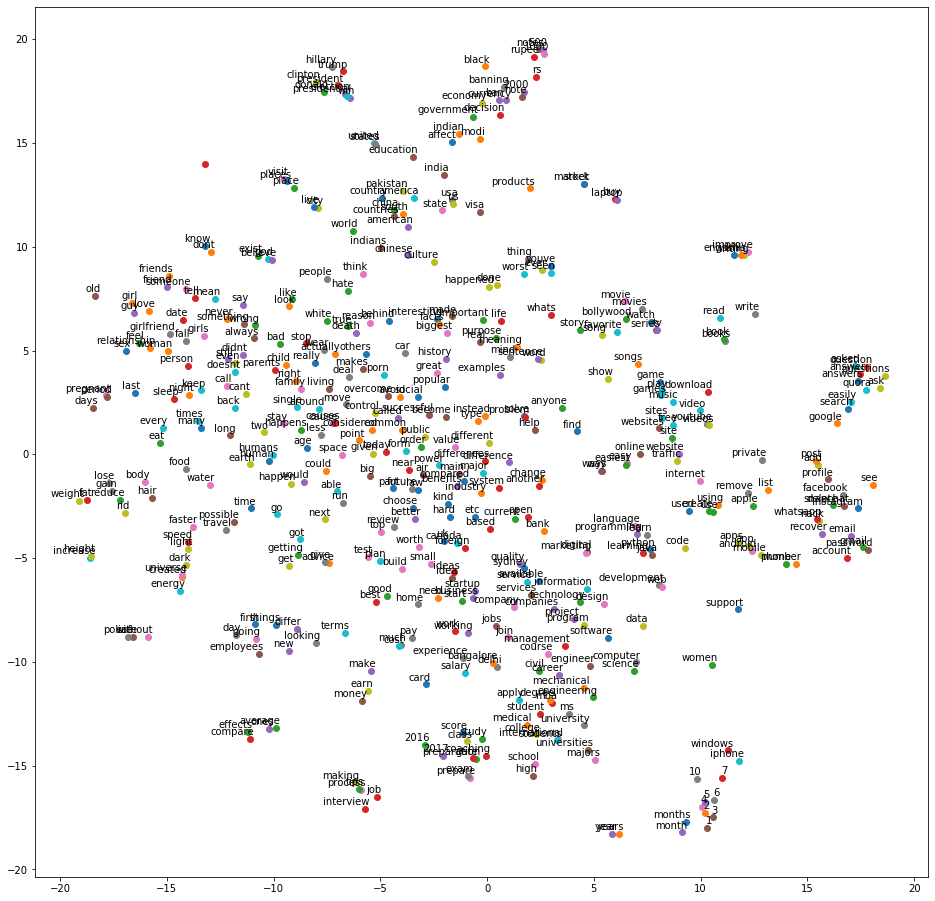

In [9]:
tsne_plot(model)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


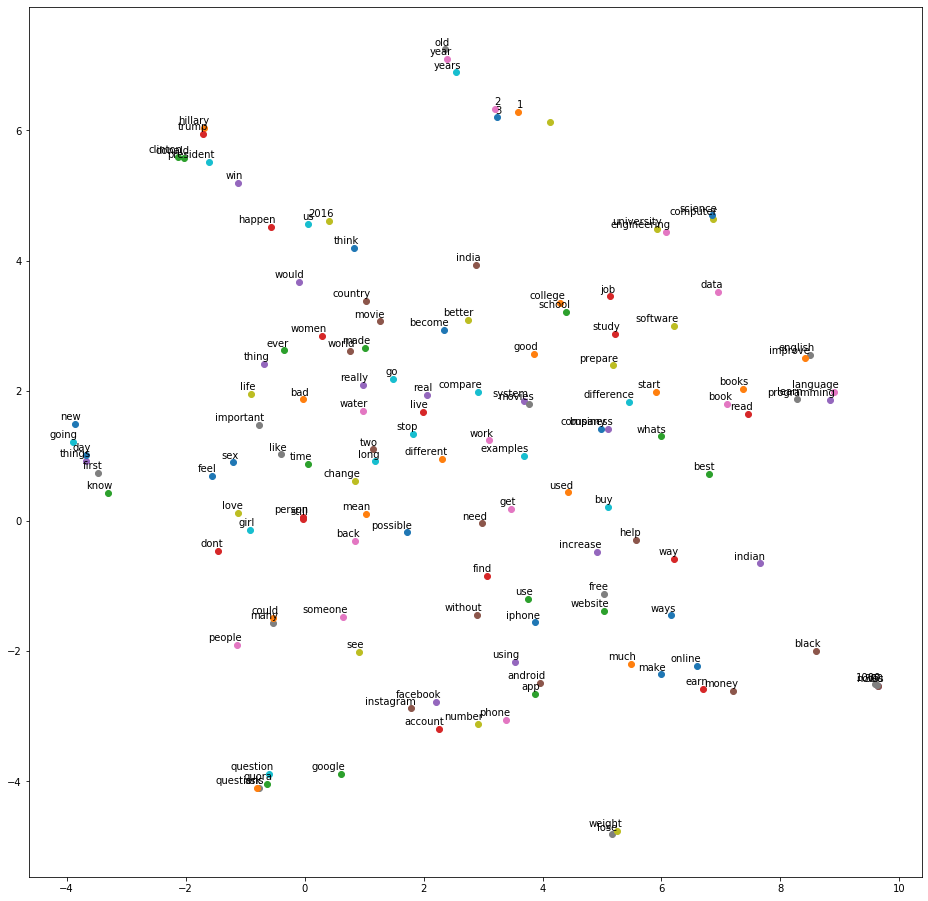

In [10]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


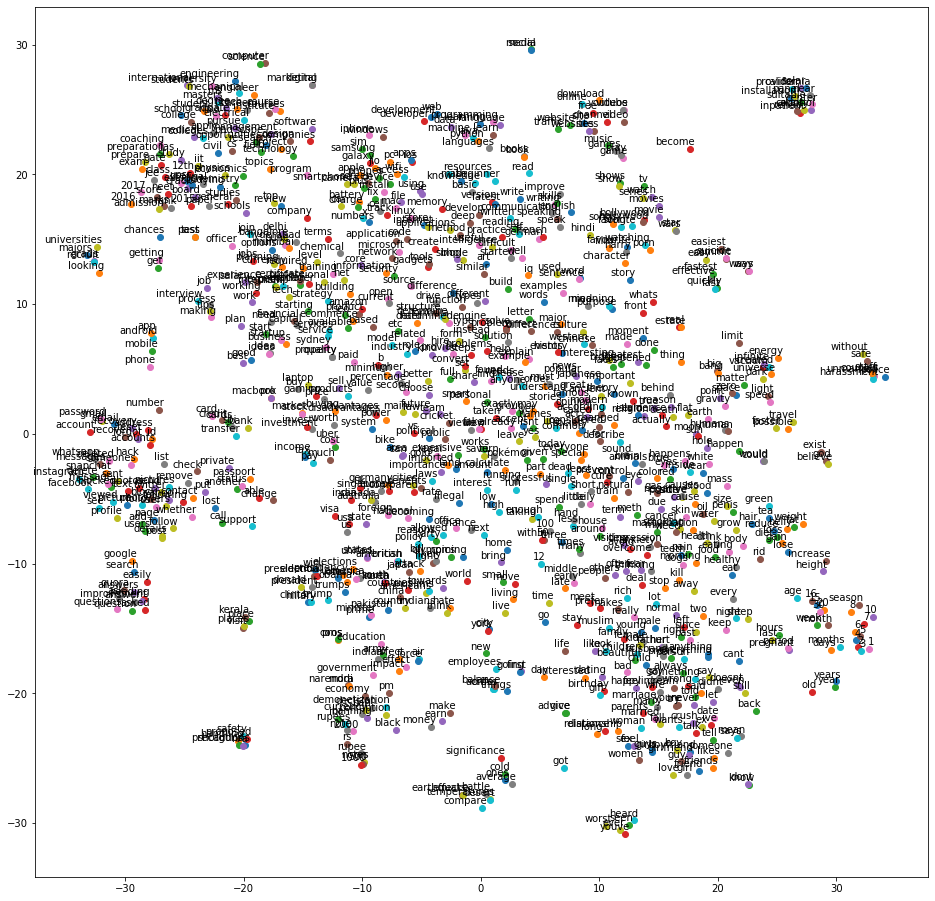

In [11]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [12]:
model.most_similar('trump')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('trumps', 0.90325927734375),
 ('hillary', 0.8010914325714111),
 ('president', 0.7946079969406128),
 ('obama', 0.7805898189544678),
 ('election', 0.7797471880912781),
 ('bill', 0.7703601121902466),
 ('becoming', 0.7460275292396545),
 ('presidential', 0.7418761253356934),
 ('russia', 0.7367607355117798),
 ('america', 0.729255199432373)]

In [13]:
model.most_similar('universe')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('space', 0.9273291826248169),
 ('zero', 0.925032913684845),
 ('created', 0.9213324189186096),
 ('vacuum', 0.91694176197052),
 ('dark', 0.8959925770759583),
 ('energy', 0.8931096792221069),
 ('infinite', 0.8896927237510681),
 ('gravity', 0.8748366832733154),
 ('light', 0.8709443211555481),
 ('bang', 0.8605214953422546)]